In [2]:
from src.preprocessing.preprocess_ucr import UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.models.vqvae_representations import PretrainedVQVAE, UntrainedVQVAE
from src.experiments.tester import RepTester, plot_results
from src.experiments.supervised_tests import supervised_test
import matplotlib.pyplot as plt
import numpy as np

In [3]:
config_dir = 'src/configs/config.yaml'

config = load_yaml_param_settings(config_dir)
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader, test_data_loader = [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

config['dataset']['dataset_name'] = 'CBF'

input_length = train_data_loader.dataset.X.shape[-1]

trained_vqvae = PretrainedVQVAE(input_length, config)

self.X_train.shape: (500, 128)
self.X_test.shape: (625, 128)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
encoder-CBF.ckpt loaded..
decoder-CBF.ckpt loaded..
vq_model-CBF.ckpt loaded..


In [4]:
mean_absolute_errors = trained_vqvae.validate(test_data_loader)

torch.Size([128, 1, 128])
torch.Size([128, 1, 128])
torch.Size([128, 1, 128])
torch.Size([128, 1, 128])
torch.Size([113, 1, 128])


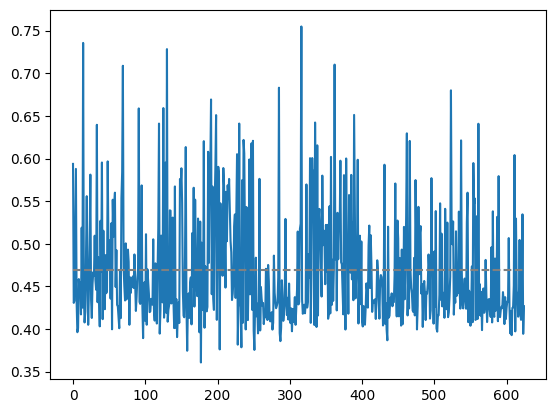

In [5]:
plt.plot(mean_absolute_errors)
mean = np.mean(mean_absolute_errors)
plt.plot([mean for x in range(len(mean_absolute_errors))], '--', c='grey')

In [6]:
print(mean)

0.46963212


In [42]:
from pytorch_metric_learning.losses import ContrastiveLoss
import torch
from src.utils import time_to_timefreq

In [38]:
batch = next(iter(test_data_loader))

In [60]:
x, y = batch
u = time_to_timefreq(x, trained_vqvae.n_fft, x.shape[1])
z = trained_vqvae.encoder(u)

In [64]:
z.shape
z = z.view(z.shape[0], -1)
z.shape

torch.Size([128, 2560])

In [65]:
loss = ContrastiveLoss()

In [73]:
y = torch.flatten(y, start_dim=0)
y.shape

torch.Size([128])

In [74]:
l = loss(z, y)

In [75]:
l

tensor(0.8415, grad_fn=<SumBackward0>)